In [264]:
%matplotlib inline
import math
import xlsxwriter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sps
from scipy.optimize import curve_fit

def gauss(x,x0,sigma):
    return 1/sigma * 1/np.sqrt(2*np.pi) * np.e**(-1/2*((x-x0)/(sigma**2)**2))

In [245]:
file = pd.read_csv('C:/Users/Админ/Desktop/gaussian.data', sep=' ')
head=str(file.iloc[0:11])
headar=head.split()
for s in range(len(headar)):
    if headar[s]=='timestep':
        t=float(headar[s+2])
    if headar[s]=='atoms':
        N=int(headar[s-1])
    if headar[s]=='atom':
        Nt=int(headar[s-1])
    if headar[s]=="Masses":
        j=s
m=np.zeros(Nt)
T=np.zeros(Nt)
for i in range(Nt):
    m[i]=float(headar[j+3*(i+1)])
    print("Введите температуру ", i+1 ," типа частиц")
    T[i]=input()

Введите температуру  1  типа частиц
1
Введите температуру  2  типа частиц
1


In [246]:
r=file.iloc[9:N+9]
x=r.iloc[:,3]
xar=x.to_numpy()
y=r.iloc[:,4]
yar=y.to_numpy()
z=r.iloc[:,5]
zar=z.to_numpy()
tp=r.iloc[:,1]
tpar=tp.to_numpy()
xear=np.array([])
year=np.array([])
zear=np.array([])
xiar=np.array([])
yiar=np.array([])
ziar=np.array([])
for i in range(len(xar)):
    if tpar[i]=='1':
        xiar=np.append(xiar,float(xar[i]))
        yiar=np.append(yiar,float(yar[i]))
        ziar=np.append(ziar,float(zar[i]))
    else:
        xear=np.append(xear,float(xar[i]))
        year=np.append(year,float(yar[i]))
        zear=np.append(zear,float(zar[i]))
Ri=np.array([])
Re=np.array([])
for i in range(len(xiar)):
    Ri=np.append(Ri,np.sqrt(xiar[i]**2+yiar[i]**2+ziar[i]**2))
    Re=np.append(Re,np.sqrt(xear[i]**2+year[i]**2+zear[i]**2))
Rim=np.mean(Ri)
Rem=np.mean(Re)
p=np.array([])
q=np.array([])
for i in range(len(Ri)):
    if Ri[i]>8*Rim:
        xiar=np.delete(xiar,i)
        yiar=np.delete(yiar,i)
        ziar=np.delete(ziar,i)
        p=np.append(p,i)
    if Re[i]>8*Rem:
        xear=np.delete(xear,i)
        year=np.delete(year,i)
        zear=np.delete(zear,i)
        q=np.append(q,i)
for i in p:
    Ri=np.delete(Ri,int(i))
for i in q:
    Re=np.delete(Re,int(i))
xim=np.mean(xiar)
yim=np.mean(yiar)
zim=np.mean(ziar)
xem=np.mean(xear)
yem=np.mean(year)
zem=np.mean(zear)
Rim=np.mean(Ri)
Rem=np.mean(Re)
for i in range(len(Ri)):
    Ri[i]-=Rim
    xiar[i]-=xim
    yiar[i]-=yim
    ziar[i]-=zim
for i in range(len(Re)):
    Re[i]-=Rem
    xear[i]-=xem
    year[i]-=yem
    zear[i]-=zem

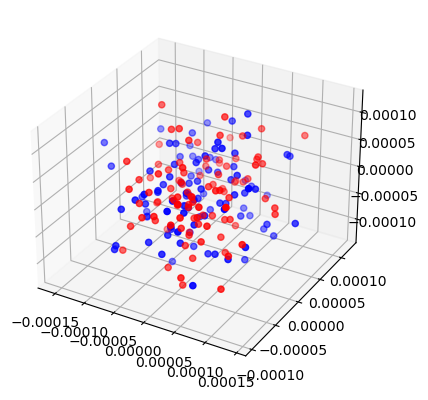

In [247]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xear, year, zear, color='blue')
ax.scatter(xiar, yiar, ziar, color='red')
plt.show()

In [274]:
dr=10
Rimax=np.max(Ri)
Rimin=np.min(Ri)
Remax=np.max(Re)
Remin=np.min(Re)
Li=Rimax-Rimin
Le=Remax-Remin
li=Li/dr
le=Le/dr
Ris=np.array([])
Res=np.array([])
for i in range(dr):
    Ris=np.append(Ris,Rimin+li*i)
    Res=np.append(Res,Remin+li*i)
Ni=np.zeros(len(Ris))
Ne=np.zeros(len(Res))
for i in range(len(Ri)):
    for j in range(len(Ris)-1):
        if Ri[i]>Ris[j] and Ri[i]<Ris[j+1]:
            Ni[j]+=1
for i in range(len(Re)):
    for j in range(len(Res)-1):
        if Re[i]>Res[j] and Re[i]<Res[j+1]:
            Ne[j]+=1
print(Ris)
print(Ni)
print(Rimin)

[-6.59295845e-05 -5.18300691e-05 -3.77305537e-05 -2.36310383e-05
 -9.53152289e-06  4.56799252e-06  1.86675079e-05  3.27670233e-05
  4.68665387e-05  6.09660542e-05]
[ 4.  8. 10. 15. 17. 16. 13.  7.  7.  0.]
-6.592958452013832e-05


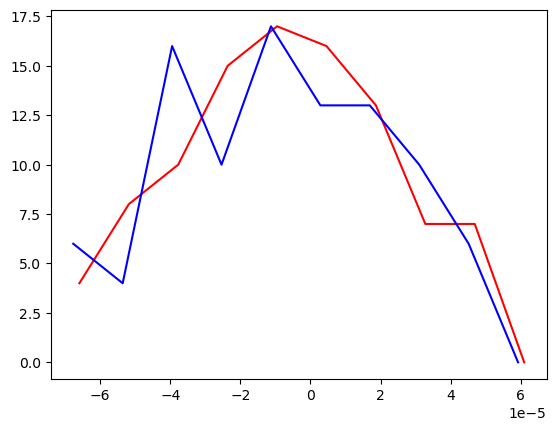

In [249]:
fig = plt.figure()
ax = plt.axes()
ax.plot(Ris,Ni,color='red')
ax.plot(Res,Ne,color='blue')
plt.show()

In [252]:
ar=np.zeros((4,len(Ni)))
for i in range(3):
    for j in range(len(Ni)):
        ar[0][j]=Ni[j]
        ar[1][j]=Ris[j]
        ar[2][j]=Ne[j]
        ar[3][j]=Res[j]
ar = pd.DataFrame(ar).T
ar.to_excel("C:/Users/Админ/Desktop/ar.xlsx")

[[inf inf]
 [inf inf]]
